# FRAUDULENT DETENTION

In [4]:
# Importing the Pandas Library
import pandas as pd

In [5]:
# Loading in the files
acc_act = pd.read_csv(r"C:\Users\USER\Downloads\Fraud_Detection_Dataset\Data\Customer Profiles\account_activity.csv")
cust_data = pd.read_csv(r"C:\Users\USER\Downloads\Fraud_Detection_Dataset\Data\Customer Profiles\customer_data.csv")

In [6]:
acc_act.head()

,CustomerID,AccountBalance,LastLogin
0,1001,9507.272060,2022-01-01
1,1002,7408.704536,2022-01-02
2,1003,1715.321989,2022-01-03
3,1004,3101.509134,2022-01-04
4,1005,5405.766914,2022-01-05


In [7]:
cust_data.head()

,CustomerID,Name,Age,Address
0,1001,Customer 1001,54,Address 1001
1,1002,Customer 1002,35,Address 1002
2,1003,Customer 1003,40,Address 1003
3,1004,Customer 1004,30,Address 1004
4,1005,Customer 1005,46,Address 1005


In [8]:
cust_profile = pd.merge(acc_act,cust_data, on="CustomerID",how="outer")

In [9]:
cust_profile.head()

,CustomerID,AccountBalance,LastLogin,Name,Age,Address
0,1001,9507.272060,2022-01-01,Customer 1001,54,Address 1001
1,1002,7408.704536,2022-01-02,Customer 1002,35,Address 1002
2,1003,1715.321989,2022-01-03,Customer 1003,40,Address 1003
3,1004,3101.509134,2022-01-04,Customer 1004,30,Address 1004
4,1005,5405.766914,2022-01-05,Customer 1005,46,Address 1005


In [10]:
cust_profile.isnull().sum()

CustomerID        0
AccountBalance    0
LastLogin         0
Name              0
Age               0
Address           0
dtype: int64

In [11]:
fraud_ind = pd.read_csv(r"C:\Users\USER\Downloads\Fraud_Detection_Dataset\Data\Fraudulent Patterns\fraud_indicators.csv")
sus_act = pd.read_csv(r"C:\Users\USER\Downloads\Fraud_Detection_Dataset\Data\Fraudulent Patterns\suspicious_activity.csv")

In [12]:
fraud_ind.head()

,TransactionID,FraudIndicator
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0


In [13]:
sus_act.head()

,CustomerID,SuspiciousFlag
0,1001,0
1,1002,0
2,1003,0
3,1004,0
4,1005,0


In [14]:
cust_info = pd.merge(sus_act,cust_profile,on="CustomerID", how="outer")

In [20]:
cust_info.head()

,CustomerID,SuspiciousFlag,AccountBalance,LastLogin,Name,Age,Address
0,1001,0,9507.272060,2022-01-01,Customer 1001,54,Address 1001
1,1002,0,7408.704536,2022-01-02,Customer 1002,35,Address 1002
2,1003,0,1715.321989,2022-01-03,Customer 1003,40,Address 1003
3,1004,0,3101.509134,2022-01-04,Customer 1004,30,Address 1004
4,1005,0,5405.766914,2022-01-05,Customer 1005,46,Address 1005


In [48]:
cust_info.isnull().sum()

CustomerID        0
SuspiciousFlag    0
AccountBalance    0
LastLogin         0
Name              0
Age               0
Address           0
dtype: int64

In [21]:
merc_data = pd.read_csv(r"C:\Users\USER\Downloads\Fraud_Detection_Dataset\Data\Merchant Information\merchant_data.csv")
trans_cat = pd.read_csv(r"C:\Users\USER\Downloads\Fraud_Detection_Dataset\Data\Merchant Information\transaction_category_labels.csv")

In [22]:
trans_cat.head()

,TransactionID,Category
0,1,Other
1,2,Online
2,3,Travel
3,4,Travel
4,5,Other


In [23]:
merc_data.head() 

,MerchantID,MerchantName,Location
0,2001,Merchant 2001,Location 2001
1,2002,Merchant 2002,Location 2002
2,2003,Merchant 2003,Location 2003
3,2004,Merchant 2004,Location 2004
4,2005,Merchant 2005,Location 2005


In [24]:
fraud_cat = pd.merge(trans_cat,fraud_ind, on="TransactionID",how="outer")

In [25]:
fraud_cat.head()

,TransactionID,Category,FraudIndicator
0,1,Other,0
1,2,Online,0
2,3,Travel,0
3,4,Travel,0
4,5,Other,0


In [26]:
amount_data = pd.read_csv(r"C:\Users\USER\Downloads\Fraud_Detection_Dataset\Data\Transaction Amounts\amount_data.csv")

In [27]:
anomaly_scores = pd.read_csv(r"C:\Users\USER\Downloads\Fraud_Detection_Dataset\Data\Transaction Amounts\anomaly_scores.csv")

In [28]:
amount_data.head()

,TransactionID,TransactionAmount
0,1,79.413607
1,2,12.053087
2,3,33.310357
3,4,46.121117
4,5,54.051618


In [29]:
anomaly_scores

,TransactionID,AnomalyScore
0,1,0.686699
1,2,0.081749
2,3,0.023857
3,4,0.876994
4,5,0.034059
...,...,...
995,996,0.266778
996,997,0.512483
997,998,0.367740
998,999,0.960364


In [33]:
trans_merge1 = pd.merge(amount_data,anomaly_scores,on="TransactionID",how="outer")

In [34]:
trans_merge2 = pd.merge(trans_merge1,fraud_cat,on="TransactionID",how="outer")

In [35]:
trans_merge2.head()

,TransactionID,TransactionAmount,AnomalyScore,Category,FraudIndicator
0,1,79.413607,0.686699,Other,0
1,2,12.053087,0.081749,Online,0
2,3,33.310357,0.023857,Travel,0
3,4,46.121117,0.876994,Travel,0
4,5,54.051618,0.034059,Other,0


In [36]:
trans_meta = pd.read_csv(r"C:\Users\USER\Downloads\Fraud_Detection_Dataset\Data\Transaction Data\transaction_metadata.csv")
trans_record = pd.read_csv(r"C:\Users\USER\Downloads\Fraud_Detection_Dataset\Data\Transaction Data\transaction_records.csv")

In [38]:
trans_meta.head()

,TransactionID,Timestamp,MerchantID
0,1,2022-01-01 00:00:00,2701
1,2,2022-01-01 01:00:00,2070
2,3,2022-01-01 02:00:00,2238
3,4,2022-01-01 03:00:00,2879
4,5,2022-01-01 04:00:00,2966


In [39]:
trans_record.head()

,TransactionID,Amount,CustomerID
0,1,55.530334,1952
1,2,12.881180,1027
2,3,50.176322,1955
3,4,41.634001,1796
4,5,78.122853,1946


In [40]:
trans_data = pd.merge(trans_meta,trans_record,on="TransactionID",how="outer")

In [41]:
trans_merge3 = pd.merge(trans_data,trans_merge2,on="TransactionID",how="outer")

In [43]:
trans_merge3.head()

,TransactionID,Timestamp,MerchantID,Amount,CustomerID,TransactionAmount,AnomalyScore,Category,FraudIndicator
0,1,2022-01-01 00:00:00,2701,55.530334,1952,79.413607,0.686699,Other,0
1,2,2022-01-01 01:00:00,2070,12.881180,1027,12.053087,0.081749,Online,0
2,3,2022-01-01 02:00:00,2238,50.176322,1955,33.310357,0.023857,Travel,0
3,4,2022-01-01 03:00:00,2879,41.634001,1796,46.121117,0.876994,Travel,0
4,5,2022-01-01 04:00:00,2966,78.122853,1946,54.051618,0.034059,Other,0


In [44]:
trans_merc = pd.merge(trans_merge3,merc_data,on="MerchantID",how="outer")

In [45]:
trans_merc.head()

,TransactionID,Timestamp,MerchantID,Amount,CustomerID,TransactionAmount,AnomalyScore,Category,FraudIndicator,MerchantName,Location
0,816.0,2022-02-03 23:00:00,2001,26.521145,1924.0,54.402165,0.209246,Online,0.0,Merchant 2001,Location 2001
1,NaN,NaN,2002,NaN,NaN,NaN,NaN,NaN,NaN,Merchant 2002,Location 2002
2,NaN,NaN,2003,NaN,NaN,NaN,NaN,NaN,NaN,Merchant 2003,Location 2003
3,430.0,2022-01-18 21:00:00,2004,26.733576,1167.0,77.485946,0.096968,Retail,0.0,Merchant 2004,Location 2004
4,623.0,2022-01-26 22:00:00,2004,75.262308,1730.0,99.095151,0.840506,Food,0.0,Merchant 2004,Location 2004


In [46]:
trans_merc.isnull().sum()

TransactionID        349
Timestamp            349
MerchantID             0
Amount               349
CustomerID           349
TransactionAmount    349
AnomalyScore         349
Category             349
FraudIndicator       349
MerchantName           0
Location               0
dtype: int64

In [47]:
trans_merc.shape

(1349, 11)

In [49]:
trans_merc_cust = pd.merge(trans_merc,cust_info,on="CustomerID",how="outer")

In [50]:
trans_merc_cust.head()

,TransactionID,Timestamp,MerchantID,Amount,CustomerID,TransactionAmount,AnomalyScore,Category,FraudIndicator,MerchantName,Location,SuspiciousFlag,AccountBalance,LastLogin,Name,Age,Address
0,787.0,2022-02-02 18:00:00,2627.0,33.670626,1001.0,87.375444,0.030921,Food,0.0,Merchant 2627,Location 2627,0.0,9507.272060,2022-01-01,Customer 1001,54.0,Address 1001
1,NaN,NaN,NaN,NaN,1002.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,7408.704536,2022-01-02,Customer 1002,35.0,Address 1002
2,641.0,2022-01-27 16:00:00,2496.0,30.980239,1003.0,46.044172,0.961552,Travel,0.0,Merchant 2496,Location 2496,0.0,1715.321989,2022-01-03,Customer 1003,40.0,Address 1003
3,921.0,2022-02-08 08:00:00,2111.0,45.849784,1004.0,36.534720,0.652188,Other,0.0,Merchant 2111,Location 2111,0.0,3101.509134,2022-01-04,Customer 1004,30.0,Address 1004
4,450.0,2022-01-19 17:00:00,2184.0,11.167088,1004.0,85.085061,0.525809,Other,0.0,Merchant 2184,Location 2184,0.0,3101.509134,2022-01-04,Customer 1004,30.0,Address 1004


In [51]:
trans_merc_cust.isnull().sum()

TransactionID        713
Timestamp            713
MerchantID           364
Amount               713
CustomerID           349
TransactionAmount    713
AnomalyScore         713
Category             713
FraudIndicator       713
MerchantName         364
Location             364
SuspiciousFlag       349
AccountBalance       349
LastLogin            349
Name                 349
Age                  349
Address              349
dtype: int64

In [52]:
trans_merc_cust.shape

(1713, 17)

<h2>Cleaning the Datasets</h2>

In [151]:
data = trans_merc_cust

In [152]:
data.shape

(1713, 17)

In [153]:
print(data)

      TransactionID            Timestamp  MerchantID     Amount  CustomerID  \
0             787.0  2022-02-02 18:00:00      2627.0  33.670626      1001.0   
1               NaN                  NaN         NaN        NaN      1002.0   
2             641.0  2022-01-27 16:00:00      2496.0  30.980239      1003.0   
3             921.0  2022-02-08 08:00:00      2111.0  45.849784      1004.0   
4             450.0  2022-01-19 17:00:00      2184.0  11.167088      1004.0   
...             ...                  ...         ...        ...         ...   
1708            NaN                  NaN      2987.0        NaN         NaN   
1709            NaN                  NaN      2988.0        NaN         NaN   
1710            NaN                  NaN      2990.0        NaN         NaN   
1711            NaN                  NaN      2996.0        NaN         NaN   
1712            NaN                  NaN      2999.0        NaN         NaN   

      TransactionAmount  AnomalyScore Category  Fra

<h3>Dropping Missing Values</h3>

In [154]:
data = data.dropna(subset=['TransactionID','Amount','MerchantID','CustomerID','FraudIndicator'])

In [155]:
data.isnull().sum()

TransactionID        0
Timestamp            0
MerchantID           0
Amount               0
CustomerID           0
TransactionAmount    0
AnomalyScore         0
Category             0
FraudIndicator       0
MerchantName         0
Location             0
SuspiciousFlag       0
AccountBalance       0
LastLogin            0
Name                 0
Age                  0
Address              0
dtype: int64

In [156]:
print(data)

      TransactionID            Timestamp  MerchantID     Amount  CustomerID  \
0             787.0  2022-02-02 18:00:00      2627.0  33.670626      1001.0   
2             641.0  2022-01-27 16:00:00      2496.0  30.980239      1003.0   
3             921.0  2022-02-08 08:00:00      2111.0  45.849784      1004.0   
4             450.0  2022-01-19 17:00:00      2184.0  11.167088      1004.0   
5             599.0  2022-01-25 22:00:00      2191.0  81.808651      1005.0   
...             ...                  ...         ...        ...         ...   
1359          236.0  2022-01-10 19:00:00      2789.0  69.825072      1999.0   
1360          805.0  2022-02-03 12:00:00      2843.0  34.780068      1999.0   
1361           44.0  2022-01-02 19:00:00      2423.0  86.971920      2000.0   
1362          817.0  2022-02-04 00:00:00      2570.0  80.666984      2000.0   
1363          779.0  2022-02-02 10:00:00      2780.0  86.049092      2000.0   

      TransactionAmount  AnomalyScore Category  Fra

<h3>Checking for Duplicates</h3>

In [157]:
print(data.duplicated().sum())

0


In [158]:
print(data['Name'])

0       Customer 1001
2       Customer 1003
3       Customer 1004
4       Customer 1004
5       Customer 1005
            ...      
1359    Customer 1999
1360    Customer 1999
1361    Customer 2000
1362    Customer 2000
1363    Customer 2000
Name: Name, Length: 1000, dtype: object


<h3>Dropping Irrelevant columns</h3>

In [159]:
data = data.drop(['Name','Address','LastLogin'],axis=1)

In [160]:
print(data)

      TransactionID            Timestamp  MerchantID     Amount  CustomerID  \
0             787.0  2022-02-02 18:00:00      2627.0  33.670626      1001.0   
2             641.0  2022-01-27 16:00:00      2496.0  30.980239      1003.0   
3             921.0  2022-02-08 08:00:00      2111.0  45.849784      1004.0   
4             450.0  2022-01-19 17:00:00      2184.0  11.167088      1004.0   
5             599.0  2022-01-25 22:00:00      2191.0  81.808651      1005.0   
...             ...                  ...         ...        ...         ...   
1359          236.0  2022-01-10 19:00:00      2789.0  69.825072      1999.0   
1360          805.0  2022-02-03 12:00:00      2843.0  34.780068      1999.0   
1361           44.0  2022-01-02 19:00:00      2423.0  86.971920      2000.0   
1362          817.0  2022-02-04 00:00:00      2570.0  80.666984      2000.0   
1363          779.0  2022-02-02 10:00:00      2780.0  86.049092      2000.0   

      TransactionAmount  AnomalyScore Category  Fra

In [66]:
print(data.isnull().sum())

TransactionID        0
Timestamp            0
MerchantID           0
Amount               0
CustomerID           0
TransactionAmount    0
AnomalyScore         0
Category             0
FraudIndicator       0
MerchantName         0
Location             0
SuspiciousFlag       0
AccountBalance       0
Age                  0
dtype: int64


<h3>Checking Data types</h3>

In [161]:
print(data.dtypes)

TransactionID        float64
Timestamp             object
MerchantID           float64
Amount               float64
CustomerID           float64
TransactionAmount    float64
AnomalyScore         float64
Category              object
FraudIndicator       float64
MerchantName          object
Location              object
SuspiciousFlag       float64
AccountBalance       float64
Age                  float64
dtype: object


<h3>Converting Timestamp to datetime</h3>

In [162]:
data['Timestamp'] = pd.to_datetime(data['Timestamp'])

In [163]:
print(data['Timestamp'])

0      2022-02-02 18:00:00
2      2022-01-27 16:00:00
3      2022-02-08 08:00:00
4      2022-01-19 17:00:00
5      2022-01-25 22:00:00
               ...        
1359   2022-01-10 19:00:00
1360   2022-02-03 12:00:00
1361   2022-01-02 19:00:00
1362   2022-02-04 00:00:00
1363   2022-02-02 10:00:00
Name: Timestamp, Length: 1000, dtype: datetime64[ns]


<h3>Coverting FraudIndicator from Float to Inter</h3>

In [164]:
data['FraudIndicator'] = data['FraudIndicator'].astype(int)

In [165]:
print(data['FraudIndicator'])

0       0
2       0
3       0
4       0
5       0
       ..
1359    0
1360    0
1361    0
1362    0
1363    0
Name: FraudIndicator, Length: 1000, dtype: int64


<h3>Converting Age from float to integer</h3>

In [166]:
print(data['Age'])

0       54.0
2       40.0
3       30.0
4       30.0
5       46.0
        ... 
1359    57.0
1360    57.0
1361    42.0
1362    42.0
1363    42.0
Name: Age, Length: 1000, dtype: float64


In [167]:
data['Age'] = data['Age'].astype(int)

In [168]:
print(data['Age'])

0       54
2       40
3       30
4       30
5       46
        ..
1359    57
1360    57
1361    42
1362    42
1363    42
Name: Age, Length: 1000, dtype: int64


<h3>Converting CustomerID from float to integer</h3>

In [169]:
print(data['CustomerID'])

0       1001.0
2       1003.0
3       1004.0
4       1004.0
5       1005.0
         ...  
1359    1999.0
1360    1999.0
1361    2000.0
1362    2000.0
1363    2000.0
Name: CustomerID, Length: 1000, dtype: float64


In [170]:
data['CustomerID'] = data['CustomerID'].astype(int)

In [171]:
print(data['CustomerID'])


0       1001
2       1003
3       1004
4       1004
5       1005
        ... 
1359    1999
1360    1999
1361    2000
1362    2000
1363    2000
Name: CustomerID, Length: 1000, dtype: int64


<h3>Converting TransactionID from float to integer</h3>

In [172]:
print(data['TransactionID'])

0       787.0
2       641.0
3       921.0
4       450.0
5       599.0
        ...  
1359    236.0
1360    805.0
1361     44.0
1362    817.0
1363    779.0
Name: TransactionID, Length: 1000, dtype: float64


In [173]:
data['TransactionID'] = data['TransactionID'].astype(int)

In [174]:
print(data['TransactionID'])

0       787
2       641
3       921
4       450
5       599
       ... 
1359    236
1360    805
1361     44
1362    817
1363    779
Name: TransactionID, Length: 1000, dtype: int64


<h3>Converting MerchantID from float to integer</h3>

In [175]:
print(data['MerchantID'])

0       2627.0
2       2496.0
3       2111.0
4       2184.0
5       2191.0
         ...  
1359    2789.0
1360    2843.0
1361    2423.0
1362    2570.0
1363    2780.0
Name: MerchantID, Length: 1000, dtype: float64


In [176]:
data['MerchantID'] = data['MerchantID'].astype(int)

In [177]:
print(data['MerchantID'])

0       2627
2       2496
3       2111
4       2184
5       2191
        ... 
1359    2789
1360    2843
1361    2423
1362    2570
1363    2780
Name: MerchantID, Length: 1000, dtype: int64


In [178]:
print(data.dtypes)

TransactionID                 int64
Timestamp            datetime64[ns]
MerchantID                    int64
Amount                      float64
CustomerID                    int64
TransactionAmount           float64
AnomalyScore                float64
Category                     object
FraudIndicator                int64
MerchantName                 object
Location                     object
SuspiciousFlag              float64
AccountBalance              float64
Age                           int64
dtype: object


In [179]:
data['SuspiciousFlag'].tail(30)

1331    0.0
1332    0.0
1333    0.0
1334    0.0
1335    0.0
1336    0.0
1338    0.0
1339    0.0
1340    0.0
1343    0.0
1344    0.0
1345    0.0
1346    0.0
1347    0.0
1348    0.0
1349    0.0
1350    0.0
1351    0.0
1352    0.0
1353    0.0
1354    0.0
1355    0.0
1356    0.0
1357    0.0
1358    0.0
1359    0.0
1360    0.0
1361    0.0
1362    0.0
1363    0.0
Name: SuspiciousFlag, dtype: float64

<h2>Basic EDA</h2>

<H4>CHECK FRAUD DISTRIBUTION</H4>

In [180]:
import matplotlib.pyplot as plt
import seaborn as sns

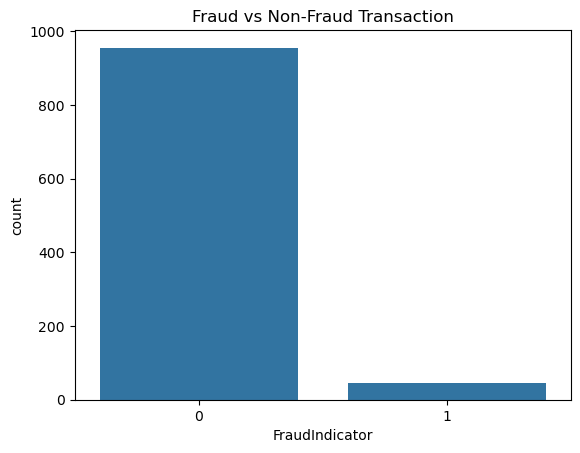

FraudIndicator
0    955
1     45
Name: count, dtype: int64


In [181]:
# Count of fraud vs non-fraud
sns.countplot(x='FraudIndicator',data=data)
plt.title('Fraud vs Non-Fraud Transaction')
plt.show()

print(data['FraudIndicator'].value_counts())

<p>4.5% of the transactions are fraudulents</p>

<h4>Check Transaction Amounts</h4>

count    1000.000000
mean       55.394871
std        25.070809
min        10.006933
25%        34.502315
50%        57.844325
75%        75.858576
max        99.887410
Name: Amount, dtype: float64


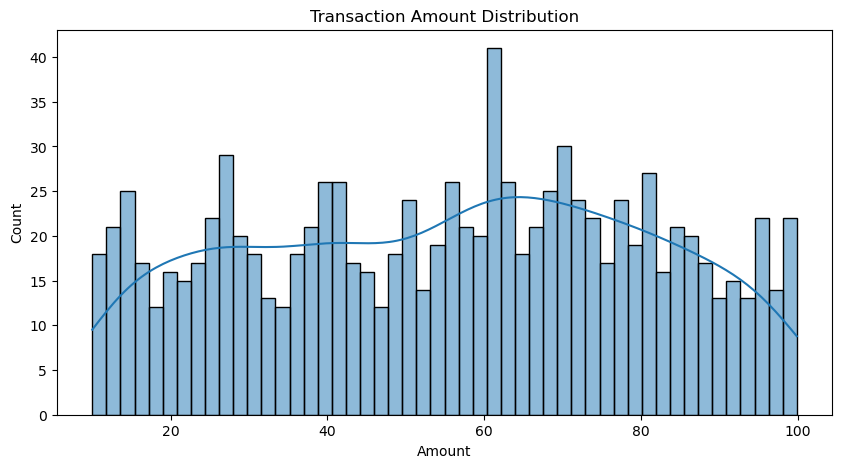

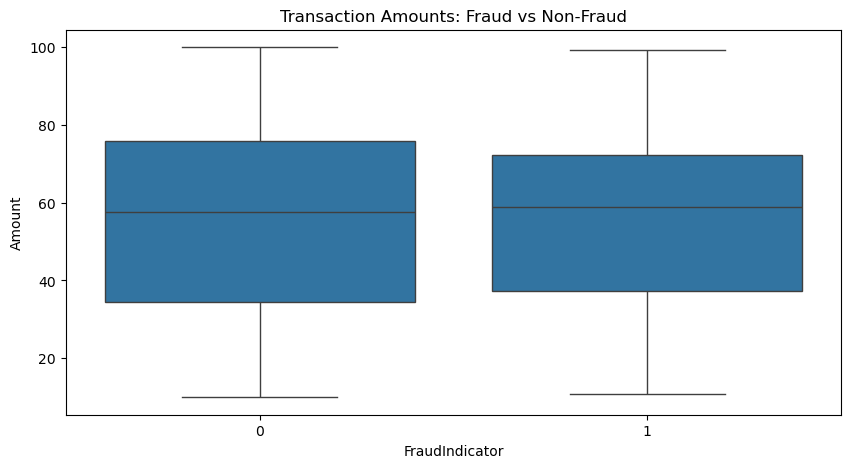

In [182]:
# Basic stats
print(data['Amount'].describe())

#Histogram of Transactions
plt.figure(figsize=(10,5))
sns.histplot(data['Amount'],bins=50,kde=True)
plt.title('Transaction Amount Distribution')
plt.xlabel('Amount')
plt.ylabel('Count')
plt.show()

# Compare fraud vs non-fraud amounts
plt.figure(figsize=(10,5))
sns.boxplot(x='FraudIndicator',y='Amount',data=data)
plt.title("Transaction Amounts: Fraud vs Non-Fraud")
plt.show()

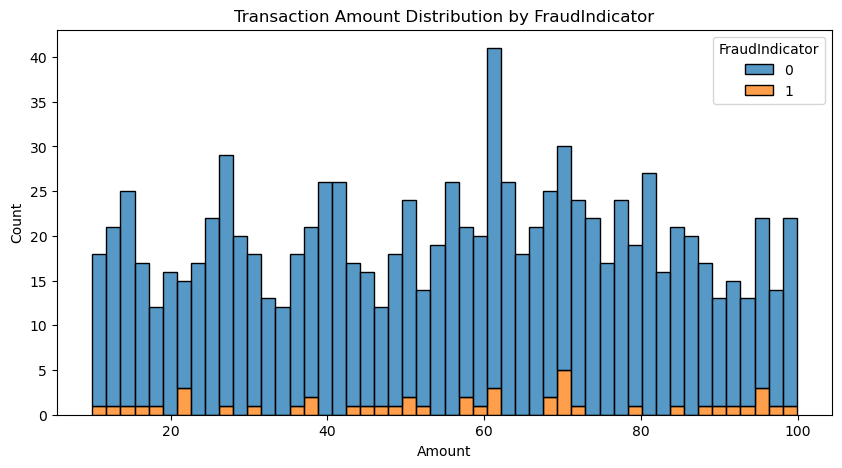

In [183]:
plt.figure(figsize=(10,5))
sns.histplot(data=data,x='Amount',bins=50,hue='FraudIndicator',multiple='stack')
plt.title('Transaction Amount Distribution by FraudIndicator')
plt.xlabel('Amount')
plt.ylabel('Count')
plt.show()

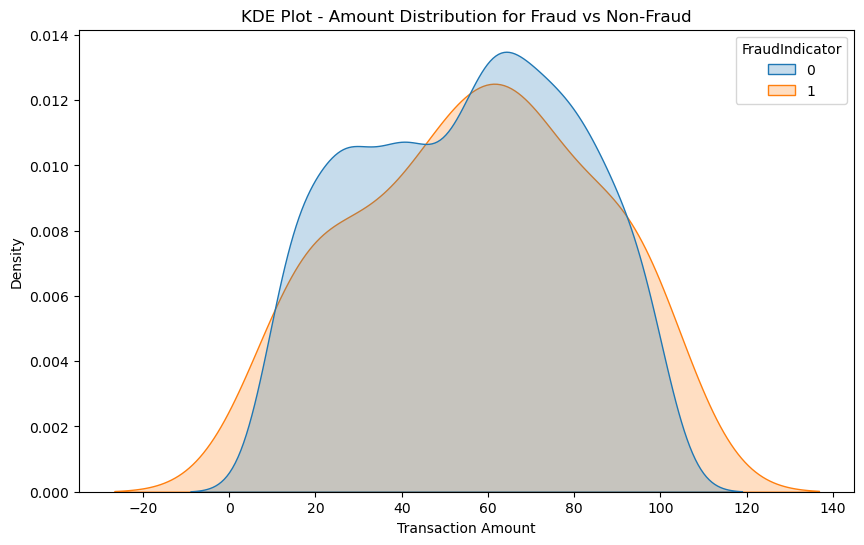

In [106]:
plt.figure(figsize=(10,6))
sns.kdeplot(
    data=data,
    x='Amount',
    hue='FraudIndicator',
    fill=True,
    common_norm=False
)
plt.title('KDE Plot - Amount Distribution for Fraud vs Non-Fraud')
plt.xlabel('Transaction Amount')
plt.show()

<h3>Interpretation of Transaction Amount Distribution(Fraud vs Non-Fraud)</h3>
<p>The KDE plot comparing transaction amount for fraud and non-fraud transactions shows clear behavioral difference between the two groups</p>
<p>Non-fraud transaction follows a more natural spending pattern, with most amount concentrated around the middle range. </p> 
<p>In contrast, fraudelent transaction are distributed over a much wider range of values, covering both moderately low and very high transaction amounts</p>
<p>This wide spread indicates that fraudsters do not follow normal spending behaviour; instead, they perform transactions of varying amounts, making their activity less predictable.</p><br>
<p>The plot also reveal that fraudulent transactions tend to occour more frequently at higher amounts compared to non-fraud transactions.</p>
<p>This suggest that fraudsters attempt to maximize the gain from each fraudulent activities, which aligns with real-world fraud behaviour.</p>
<p>Although larger amounts are a strong indicator of fraud, the overlap between the two curves in the mid-amount region shows that transaction amount alone is not sufficient to detect fraud.</p>


<h3>TIMESTAMP</h3>

In [186]:
df = data

In [187]:
df['Timestamp']

0      2022-02-02 18:00:00
2      2022-01-27 16:00:00
3      2022-02-08 08:00:00
4      2022-01-19 17:00:00
5      2022-01-25 22:00:00
               ...        
1359   2022-01-10 19:00:00
1360   2022-02-03 12:00:00
1361   2022-01-02 19:00:00
1362   2022-02-04 00:00:00
1363   2022-02-02 10:00:00
Name: Timestamp, Length: 1000, dtype: datetime64[ns]

In [188]:
df['Hour'] = df['Timestamp'].dt.hour

In [213]:
df['Weekday'] = df['Timestamp'].dt.dayofweek
df['Day'] = df['Timestamp'].dt.day

In [207]:
df['Month'] = df['Timestamp'].dt.month
df['IsWeekend'] = df['Weekday'].isin([5,6]).astype(int)
df['IsNight'] = df['Hour'].isin(range(0,6)).astype(int)

In [191]:
data['Timestamp'].head()

0   2022-02-02 18:00:00
2   2022-01-27 16:00:00
3   2022-02-08 08:00:00
4   2022-01-19 17:00:00
5   2022-01-25 22:00:00
Name: Timestamp, dtype: datetime64[ns]

In [219]:
df['Hour']

0       18
2       16
3        8
4       17
5       22
        ..
1359    19
1360    12
1361    19
1362     0
1363    10
Name: Hour, Length: 1000, dtype: int32

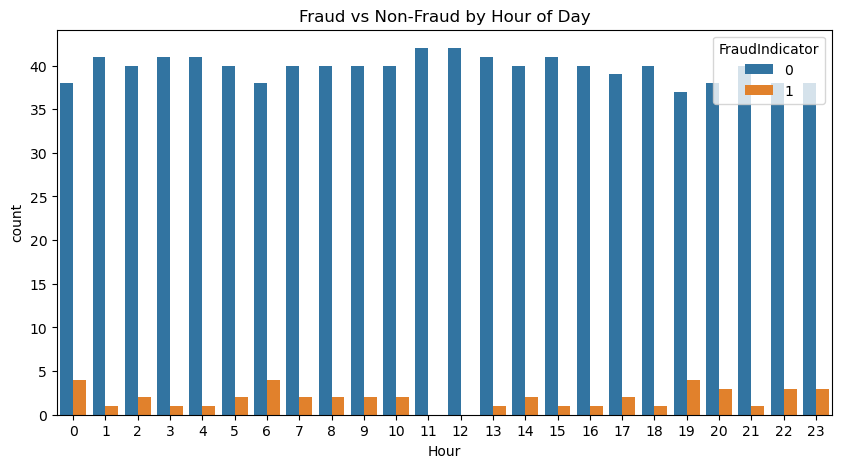

In [200]:
# Ploting Fraud by Day
plt.figure(figsize=(10,5))
sns.countplot(data=data,x='Hour',hue='FraudIndicator')
plt.title('Fraud vs Non-Fraud by Hour of Day')
plt.show()

In [210]:
# FRAUD RATE BY HOUR
fraud_by_hour = df.groupby('Hour')['FraudIndicator'].agg(['sum','count','mean'])
fraud_by_hour.columns = ['fraud_count','total_transactions','fraud_rate']

In [221]:
print(fraud_by_hour.head())

      fraud_count  total_transactions  fraud_rate
Hour                                             
0               4                  42    0.095238
1               1                  42    0.023810
2               2                  42    0.047619
3               1                  42    0.023810
4               1                  42    0.023810


KeyError: 'Hour'

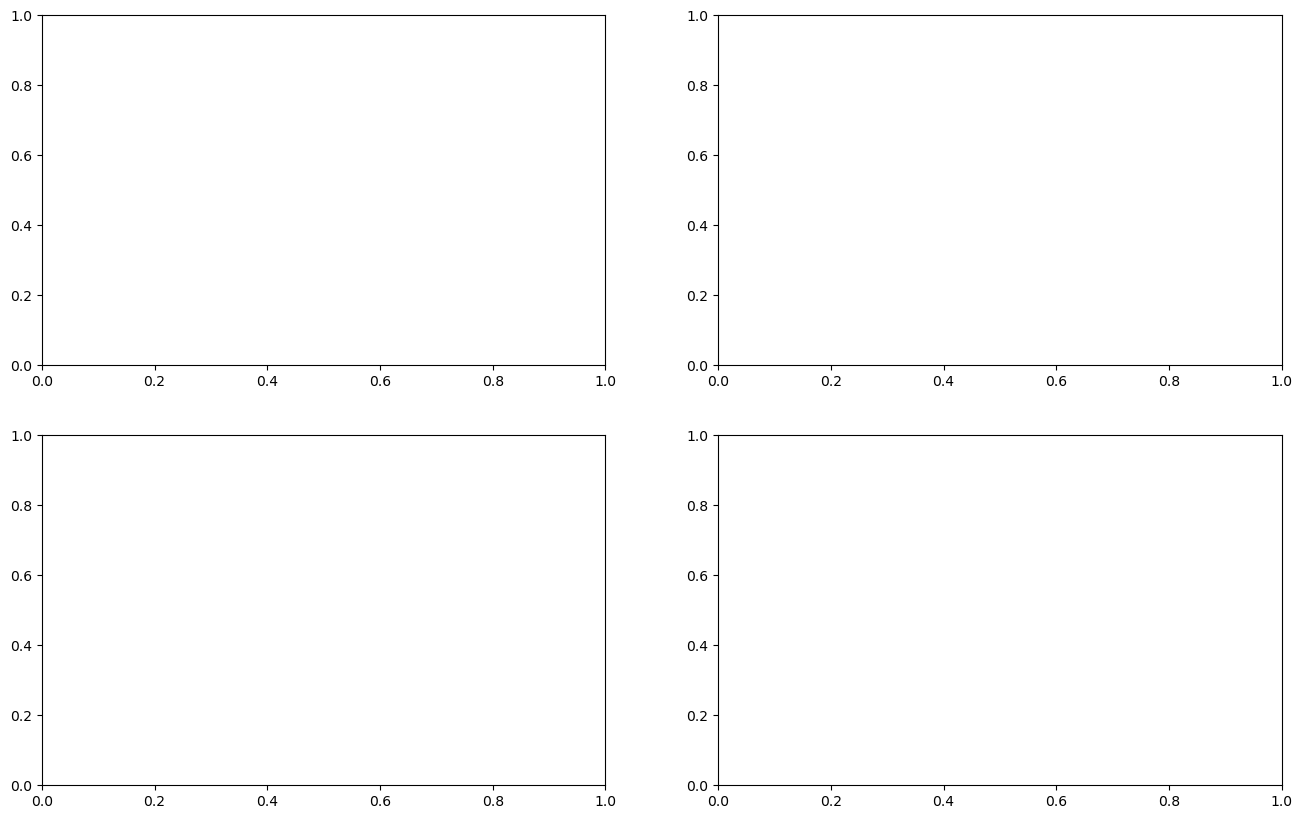

In [224]:
fig, axes = plt.subplots(2,2, figsize=(16,10))

# Hour of Day analysis
axes[0,0].bar(fraud_by_hour['Hour'],fraud_by_hour['fraud_rate'],color='crimson',alpha=0.7)
axes[0,0].set_xlabel('Hour of Day',fontsize=12)
axes[0,0].set_ylabel('Fraud Rate',fontsize=12)
axes[0,0].set_title('Fraud Rate by Hour of Day',fontsize=14,fontweight='bold')
axes[0,0].grid(axis='y',alpha=0.3)

#Transaction volume by hour
axes[0,1].bar(fraud_by_hour['Hour'],fraud_by_hour['total_transactions'],color='steelblue',alpha=0.7)
axes[0,1].set_xlabel('Hour of Day',fontsize=12)
axes[0,1].set_ylabel('Number of Transactions',fontsize=12)
axes[0,1].set_title('Transaction volume by Hour',fontsize=14,fontweight='bold')
axes[0,1].grid(axis='y',alpha=0.3)

# Day of week analysis
fraud_by_dow = df.groupby('Weekday')['FraudIndicator'].agg(['sum','count','mean']).reset_index()
fraud_by_dow.columns = ['Weekday','fraud_count','total_transactions','fraud_rate']

axes[1,0].bar(fraud_by_dow['Weekday'],fraud_by_dow['fraud_rate'],color='orange',alpha=0.7)
axes[1,0].set_xlabel('Day of Week',fontsize=12)
axes[1,0].set_ylabel('Fraud Rate',fontsize=12)
axes[1,0].set_title('Fraud rate by day of the week',fontsize=14,fontweight='bold')
axes[1,0].set_xticks(range(7))
axes[1,0].set_xticklabels(day_names)
axes[1,0].grid(axis='y',alpha=0.3)


# Weekend vs Weekday
weekend_fraud = df.groupby('IsWeekend')['FraudIndicator'].mean()
axes[1,1].bar(['Weekday','Weekend'][weekend_fraud[0],weekend_fraud[1]],color=['steelblue','coral'],alpha=0.70)
axes[1,1].set_ylabel('Fraud Rate',fontsize=12)
axes[1,1].set_title('Fraud rate: Weekday vs Weekend',fontsize=14,fontweight='bold')
axes[1,1].grid(axis='y',alpha=0.3)

plt.tight_layout()
plt.show()